# Dataset: Airline on time data
## Presentación: 
¿Alguna vez se ha quedado atrapado en un aeropuerto porque su vuelo se retrasó o canceló y se preguntó si podría haberlo predicho si hubiera tenido más datos? Esta es tu oportunidad de averiguarlo.

Los datos consisten en los detalles de llegada y salida de todos los vuelos comerciales dentro de los EE. UU., originalmente podemos obtener los datasets desde octubre de 1987 hasta abril de 2008, pero podríamos trabajar unicamente con los vuelos del 2008 por temas de almacenamiento.

[Fuente de los datos](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import plotly.express as px

In [5]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(2389217, 29)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2389217.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,2389217.0,2.505009,1.121493,1.0,1.0,3.0,4.0,4.0
DayofMonth,2389217.0,15.663856,8.750405,1.0,8.0,16.0,23.0,31.0
DayOfWeek,2389217.0,3.909625,1.980431,1.0,2.0,4.0,6.0,7.0
DepTime,2324775.0,1340.018182,480.271718,1.0,930.0,1330.0,1733.0,2400.0
CRSDepTime,2389217.0,1329.992314,465.783275,0.0,927.0,1325.0,1720.0,2359.0
ArrTime,2319121.0,1485.835066,508.129478,1.0,1110.0,1516.0,1914.0,2400.0
CRSArrTime,2389217.0,1496.743989,484.523759,1.0,1115.0,1520.0,1910.0,2400.0
FlightNum,2389217.0,2213.887980,1951.392101,1.0,605.0,1544.0,3631.0,9741.0
ActualElapsedTime,2319121.0,128.618883,70.253033,14.0,78.0,111.0,160.0,905.0


In [8]:
df.count()

Year                 2389217
Month                2389217
DayofMonth           2389217
DayOfWeek            2389217
DepTime              2324775
CRSDepTime           2389217
ArrTime              2319121
CRSArrTime           2389217
UniqueCarrier        2389217
FlightNum            2389217
TailNum              2346765
ActualElapsedTime    2319121
CRSElapsedTime       2388810
AirTime              2319121
ArrDelay             2319121
DepDelay             2324775
Origin               2389217
Dest                 2389217
Distance             2389217
TaxiIn               2319121
TaxiOut              2324775
Cancelled            2389217
CancellationCode       64442
Diverted             2389217
CarrierDelay          584583
WeatherDelay          584583
NASDelay              584583
SecurityDelay         584583
LateAircraftDelay     584583
dtype: int64

In [10]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [14]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [20]:
df.ArrDelay.describe()

count    2.319121e+06
mean     1.027357e+01
std      3.963429e+01
min     -9.100000e+01
25%     -9.000000e+00
50%      0.000000e+00
75%      1.500000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

<AxesSubplot:>

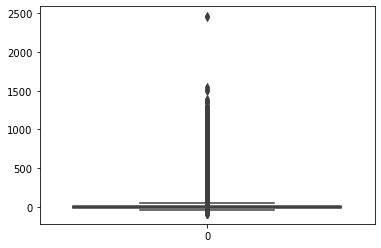

In [21]:
from seaborn import boxplot
boxplot(data=df.ArrDelay)

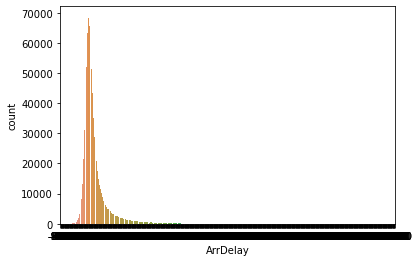

In [23]:
sns.countplot(x = df['ArrDelay'])
plt.show()

<AxesSubplot:ylabel='ArrDelay'>

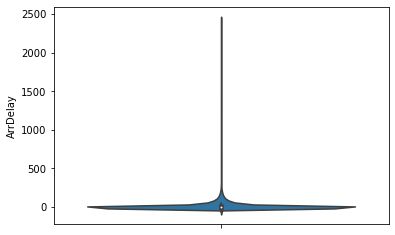

In [24]:
from seaborn import violinplot
violinplot(y = df.ArrDelay, data=df , orient="v")

<AxesSubplot:>

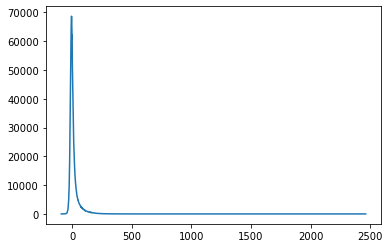

In [30]:
df.ArrDelay.value_counts().sort_index().plot.line()

<AxesSubplot:ylabel='Frequency'>

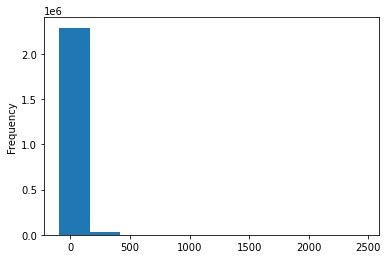

In [35]:
df['ArrDelay'].plot.hist()

In [10]:
df_explicacion = pd.read_csv('variable-descriptions.csv')
df_explicacion

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"
